In [17]:
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

In [18]:
print("Inicializando encoder")
print("Gerando Tons base")
fs = 44100
duration = 2
period = 1/fs
amplitude = 1
dtmf_frequencies = {
        '1': (697, 1209),
        '2': (697, 1336),
        '3': (697, 1477),
        '4': (770, 1209),
        '5': (770, 1336),
        '6': (770, 1477),
        '7': (852, 1209),
        '8': (852, 1336),
        '9': (852, 1477),
        '*': (941, 1209),
        '0': (941, 1336),
        '#': (941, 1477),
        'A': (697, 1633),
        'B': (770, 1633),
        'C': (852, 1633),
        'D': (941, 1633)
}

Inicializando encoder
Gerando Tons base


In [19]:
print("Aguardando usuário")
NUM = input("Digite o número que deseja discar (0-9, #, *): ")
print(f"Gerando Tom referente ao símbolo : {NUM}")

f1, f2 = dtmf_frequencies[NUM][0], dtmf_frequencies[NUM][1]
time = np.arange(0, duration, period)

sinusoids = []
for t in time:
    sinusoids.append((amplitude * np.sin(2*np.pi*f1*t)) + (amplitude * np.sin(2*np.pi*f2*t)))

print(f"Frequencias geradas: {f1} e {f2}")

# Gerando arquivo .wav
if NUM != "*":
    if os.path.exists(f"./Waves/dtmf_{NUM}.wav"):
        os.remove(f"./Waves/dtmf_{NUM}.wav")

    wavfile.write(f"./Waves/dtmf_{NUM}.wav", fs, np.array(sinusoids, dtype=np.float32))

Aguardando usuário
Gerando Tom referente ao símbolo : A
Frequencias geradas: 697 e 1633


Executando as senoides (emitindo o som)
Plotando o gráfico


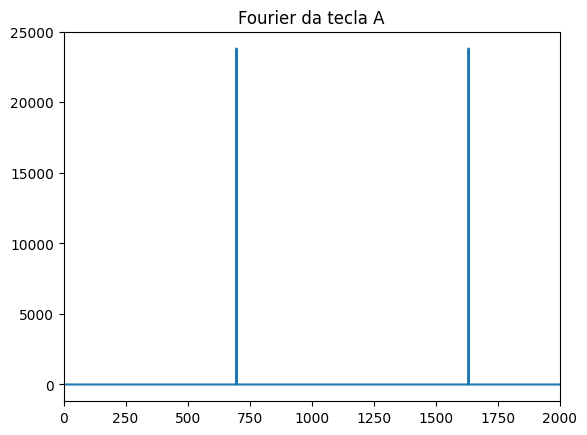

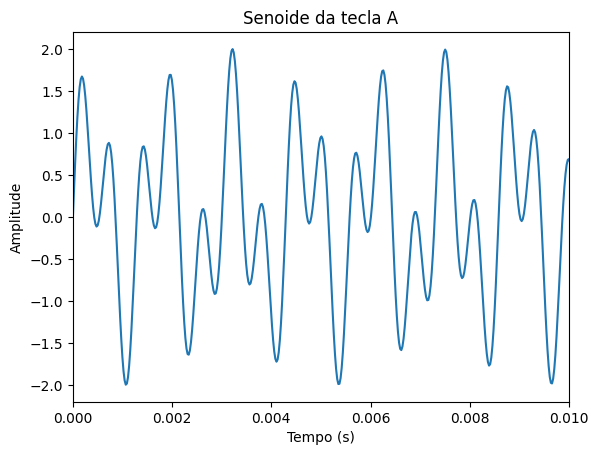

In [20]:
print("Executando as senoides (emitindo o som)")
sd.play(sinusoids, fs)
sd.wait()

print("Plotando o gráfico")
signal = signalMeu()
signal.plotFFT(sinusoids, fs)
plt.title(f"Fourier da tecla {NUM}")
plt.xlim(0, 2000)
plt.show()

plt.plot(time, sinusoids)
plt.title(f"Senoide da tecla {NUM}")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.01)
plt.show()